In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D
from keras.initializers import random_uniform
# from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
from keras.layers import SimpleRNN
#from hyperas.distributions import uniform

from keras.utils.np_utils import to_categorical
from keras import regularizers
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/new_data/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")  # use your path

In [ ]:
dataset.head()

flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   0.000000     54.00  8.334383e+07     9.5  10.392305   0.000000   
1   2.822973     57.04  8.292607e+07     9.5  10.464666   4.010353   
2   0.000000     42.00  8.312799e+07     9.5   9.165151   0.000000   
3   0.000000     50.00  8.301570e+07     9.5  10.000000   0.000000   
4  23.113111     57.88  8.297300e+07     9.5  11.346876  32.716243   

    Covariance  Variance  Weight             label  
0     0.000000      0.00  141.55  DDoS-RSTFINFlood  
1   160.987842      0.05  141.55     DoS-TCP_Flood  
2     0.000000      0.00  141.55   DDoS-ICMP_Flood  
3     0.000000      0.00  141.55     DoS-UDP_Flood  
4  3016.808286      0.19  141.55     DoS-SYN_Flood  

[5 rows x 47 columns]

In [ ]:
# Splitting dataset into features and labels.
labels = dataset['label']
features = dataset.loc[:, dataset.columns != 'label']

In [ ]:
features

flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0            0.000000          54.00           6.00     64.00     0.329807   
1            0.000000          57.04           6.33     64.00     4.290556   
2            0.000000           0.00           1.00     64.00    33.396799   
3            0.328175       76175.00          17.00     64.00  4642.133010   
4            0.117320         101.73           6.11     65.91     6.202211   
...               ...            ...            ...       ...          ...   
238682       0.000000          54.00           6.00     64.00     3.049186   
238683       0.000000          54.00           6.00     64.00   183.433732   
238684       0.000785          56.29           6.11     64.00   306.952216   
238685       0.000901          72.09           6.11     64.64   158.475986   
238686       0.000000           0.00           1.00     64.00     1.291274   

              Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0          0.329807    0.0              1.0              0.0              1.0   
1          4.290556    0.0              0.0              0.0              0.0   
2         33.396799    0.0              0.0              0.0              0.0   
3       4642.133010    0.0              0.0              0.0              0.0   
4          6.202211    0.0              0.0              1.0              0.0   
...             ...    ...              ...              ...              ...   
238682     3.049186    0.0              1.0              0.0              1.0   
238683   183.433732    0.0              0.0              0.0              0.0   
238684   306.952216    0.0              0.0              1.0              0.0   
238685   158.475986    0.0              0.0              0.0              0.0   
238686     1.291274    0.0              0.0              0.0              0.0   

        ...        AVG        Std  Tot size           IAT  Number   Magnitue  \
0       ...  54.000000   0.000000     54.00  8.334383e+07     9.5  10.392305   
1       ...  54.796404   2.822973     57.04  8.292607e+07     9.5  10.464666   
2       ...  42.000000   0.000000     42.00  8.312799e+07     9.5   9.165151   
3       ...  50.000000   0.000000     50.00  8.301570e+07     9.5  10.000000   
4       ...  67.959230  23.113111     57.88  8.297300e+07     9.5  11.346876   
...     ...        ...        ...       ...           ...     ...        ...   
238682  ...  54.000000   0.000000     54.00  8.334449e+07     9.5  10.392305   
238683  ...  54.000000   0.000000     54.00  8.331392e+07     9.5  10.392305   
238684  ...  54.033219   0.140764     54.21  8.308883e+07     9.5  10.395538   
238685  ...  54.680248   2.450404     55.48  8.333177e+07     9.5  10.456522   
238686  ...  42.000000   0.000000     42.00  8.312453e+07     9.5   9.165151   

           Radius   Covariance  Variance  Weight  
0        0.000000     0.000000      0.00  141.55  
1        4.010353   160.987842      0.05  141.55  
2        0.000000     0.000000      0.00  141.55  
3        0.000000     0.000000      0.00  141.55  
4       32.716243  3016.808286      0.19  141.55  
...           ...          ...       ...     ...  
238682   0.000000     0.000000      0.00  141.55  
238683   0.000000     0.000000      0.00  141.55  
238684   0.200659     0.671167      0.03  141.55  
238685   3.475801    55.994224      0.17  141.55  
238686   0.000000     0.000000      0.00  141.55  

[238687 rows x 46 columns]

In [ ]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [ ]:
# Labels have been replaced with integers.

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [ ]:
# Checking that encoding reversal works.

d = LE.inverse_transform(labels)
d = pd.Series(d)
d.unique()


array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2,random_state=1)

In [ ]:
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape

((190949, 46), (190949,), (47738, 46), (47738,))

In [ ]:
features_train,  features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.25, random_state=1)
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape, features_val.shape ,labels_val.shape

((143211, 46), (143211,), (47738, 46), (47738,), (47738, 46), (47738,))

In [ ]:
import datetime
import os
log_dir = os.path.join("train_logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [ ]:
# this function has evaluation metrics
def report(prediction, y_true):
    print('        ----------Classification Report Of Classes-------------')
    print(classification_report(y_true,prediction))
    print('\n        ----------Validation Data------------------')
    print('Accuarcy:',accuracy_score(y_true, prediction)* 100)
    print('Precision: {:,.4f} %'.format(precision_score(y_true, prediction, average='weighted') * 100))
    print('Recall-score: {:,.4f}'.format(recall_score(y_true, prediction, average='weighted') * 100))
    print('F1-score: {:,.4f}'.format(f1_score(y_true, prediction, average='weighted') * 100))

In [ ]:
# plotting loss graphs w.r.t each epoch
def plotgraphs(model):
    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["accuracy"], 'o-')
    ax.plot([None] + model.history.history["val_accuracy"], 'x-')

    ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
    ax.set_title('Training/Val Accuracy Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')
    plt.show()

    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["loss"], 'o-')
    ax.plot([None] + model.history.history["val_loss"], 'x-')

    ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
    ax.set_title('Training/Val Losses Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()

### DNN Models

In [ ]:
dnn1= Sequential()

dnn1.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn1.add(Dropout(0.1))
dnn1.add(Dense(34, activation='softmax'))

dnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               12032     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 34)                8738      
                                                                 
Total params: 20,770
Trainable params: 20,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn1.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
dnn1.fit(features_train,labels_train,epochs=30,batch_size=64,
         validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
2238/2238 [==============================] - 12s 5ms/step - loss: 780.1960 - accuracy: 0.6841 - val_loss: 278.7737 - val_accuracy: 0.7780
Epoch 2/30
2238/2238 [==============================] - 11s 5ms/step - loss: 175.3023 - accuracy: 0.7596 - val_loss: 14.4664 - val_accuracy: 0.7790
Epoch 3/30
2238/2238 [==============================] - 10s 5ms/step - loss: 7.6686 - accuracy: 0.7787 - val_loss: 3.1060 - val_accuracy: 0.7998
Epoch 4/30
2238/2238 [==============================] - 12s 5ms/step - loss: 2.1167 - accuracy: 0.7856 - val_loss: 1.2228 - val_accuracy: 0.8008
Epoch 5/30
2238/2238 [==============================] - 10s 4ms/step - loss: 1.0548 - accuracy: 0.7975 - val_loss: 3.6502 - val_accuracy: 0.8027
Epoch 6/30
2238/2238 [==============================] - 11s 5ms/step - loss: 1.5187 - accuracy: 0.8021 - val_loss: 2.4080 - val_accuracy: 0.8062
Epoch 7/30
2238/2238 [==============================] - 11s 5ms/step - loss: 0.8912 - accuracy: 0.8109 - val_loss: 2.4644 -

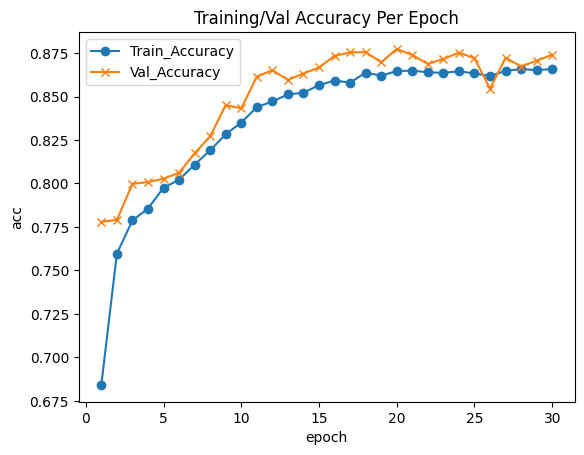

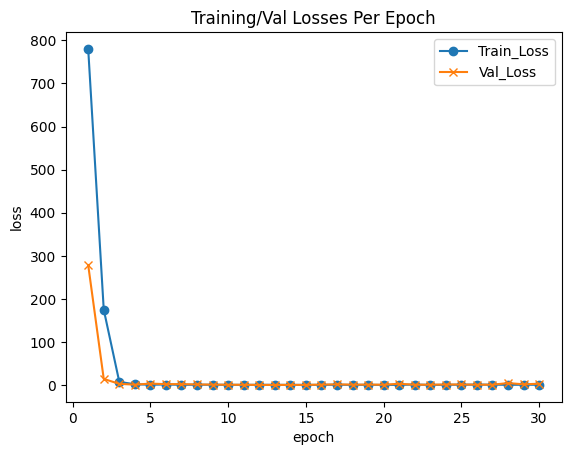

In [ ]:
plotgraphs(dnn1)

In [ ]:
predict = np.argmax(dnn1.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

1492/1492 [==============================] - 3s 2ms/step


In [ ]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      0.98      0.45      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00       290
           5       0.60      0.10      0.18        29
           6       1.00      0.99      0.99      7110
           7       0.00      0.00      0.00       463
           8       1.00      0.98      0.99      4225
           9       0.98      0.98      0.98      4180
          10       0.94      0.92      0.93      4249
          11       0.00      0.00      0.00        25
          12       0.96      0.95      0.96      3602
          13       0.97      0.96      0.97      4615
          14       0.83      0.95      0.89      5591
          15       0.00      0.00      0.00       295
          16     

In [ ]:
dnn2= Sequential()

dnn2.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn2.add(Dropout(0.1))
dnn2.add(Dense(128, activation='relu'))
dnn2.add(Dropout(0.1))
dnn2.add(Dense(34, activation = 'softmax'))

dnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               12032     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 34)                4386      
                                                                 
Total params: 49,314
Trainable params: 49,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn2.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
dnn2.fit(features_train,labels_train,epochs=30,batch_size=64,
         validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
2238/2238 [==============================] - 17s 7ms/step - loss: 86.2707 - accuracy: 0.6594 - val_loss: 1.6653 - val_accuracy: 0.7158
Epoch 2/30
2238/2238 [==============================] - 15s 7ms/step - loss: 1.0912 - accuracy: 0.7454 - val_loss: 0.6995 - val_accuracy: 0.7907
Epoch 3/30
2238/2238 [==============================] - 15s 6ms/step - loss: 0.6605 - accuracy: 0.8022 - val_loss: 0.5075 - val_accuracy: 0.8370
Epoch 4/30
2238/2238 [==============================] - 18s 8ms/step - loss: 0.6734 - accuracy: 0.8169 - val_loss: 0.5269 - val_accuracy: 0.8289
Epoch 5/30
2238/2238 [==============================] - 16s 7ms/step - loss: 0.6140 - accuracy: 0.8252 - val_loss: 0.4828 - val_accuracy: 0.8355
Epoch 6/30
2238/2238 [==============================] - 15s 7ms/step - loss: 0.6298 - accuracy: 0.8260 - val_loss: 0.5391 - val_accuracy: 0.8339
Epoch 7/30
2238/2238 [==============================] - 16s 7ms/step - loss: 0.5891 - accuracy: 0.8313 - val_loss: 0.4817 - val_a

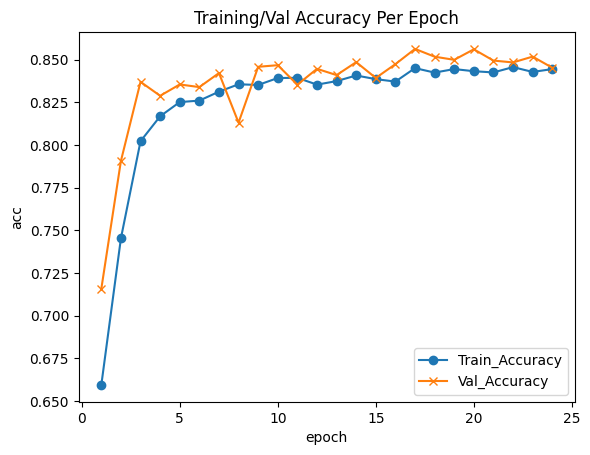

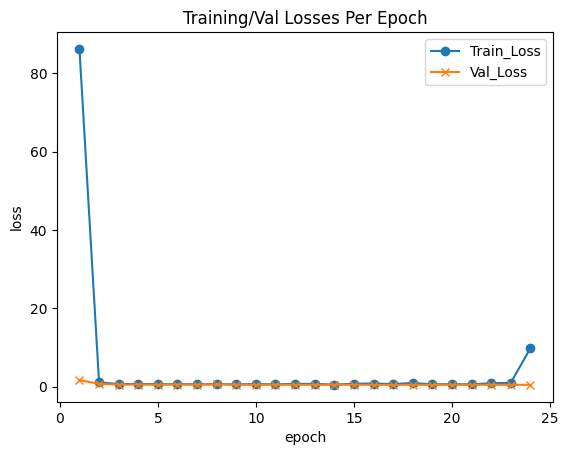

In [ ]:
plotgraphs(dnn2)

In [ ]:
predict = np.argmax(dnn2.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

1492/1492 [==============================] - 3s 2ms/step


In [ ]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.23      1.00      0.37      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00       290
           5       0.00      0.00      0.00        29
           6       1.00      0.98      0.99      7110
           7       0.00      0.00      0.00       463
           8       0.99      0.97      0.98      4225
           9       1.00      0.97      0.98      4180
          10       0.97      0.93      0.95      4249
          11       0.00      0.00      0.00        25
          12       1.00      0.96      0.98      3602
          13       0.99      0.93      0.96      4615
          14       0.85      0.74      0.79      5591
          15       0.00      0.00      0.00       295
          16     

In [ ]:
dnn3= Sequential()

dnn3.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn3.add(Dropout(0.1))
dnn3.add(Dense(128, activation='relu'))
dnn3.add(Dropout(0.1))
dnn3.add(Dense(64, activation='relu'))
dnn3.add(Dropout(0.1))
dnn3.add(Dense(34, activation = 'softmax'))

dnn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               12032     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 34)               

In [ ]:
dnn3.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
dnn3.fit(features_train,labels_train,epochs=30,batch_size=128,
         validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
1119/1119 [==============================] - 11s 9ms/step - loss: 73.8832 - accuracy: 0.6138 - val_loss: 1.1208 - val_accuracy: 0.6864
Epoch 2/30
1119/1119 [==============================] - 11s 10ms/step - loss: 1.3045 - accuracy: 0.7055 - val_loss: 0.8769 - val_accuracy: 0.7466
Epoch 3/30
1119/1119 [==============================] - 10s 9ms/step - loss: 1.0826 - accuracy: 0.7475 - val_loss: 0.7908 - val_accuracy: 0.7711
Epoch 4/30
1119/1119 [==============================] - 11s 9ms/step - loss: 0.8062 - accuracy: 0.7696 - val_loss: 0.7171 - val_accuracy: 0.7929
Epoch 5/30
1119/1119 [==============================] - 10s 9ms/step - loss: 0.7778 - accuracy: 0.7870 - val_loss: 0.7638 - val_accuracy: 0.7699
Epoch 6/30
1119/1119 [==============================] - 10s 9ms/step - loss: 0.9063 - accuracy: 0.7930 - val_loss: 0.6264 - val_accuracy: 0.8190
Epoch 7/30
1119/1119 [==============================] - 11s 10ms/step - loss: 0.8467 - accuracy: 0.7932 - val_loss: 0.6814 - val

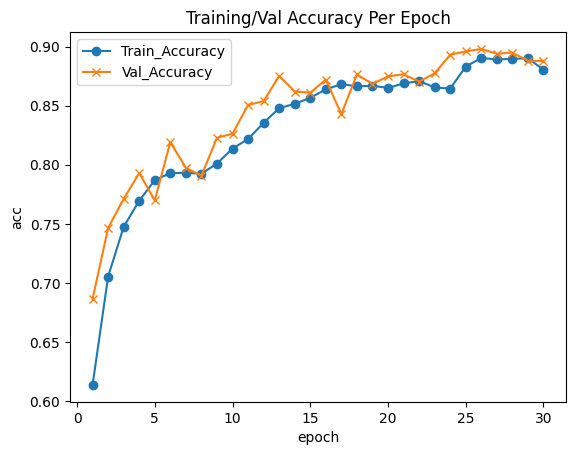

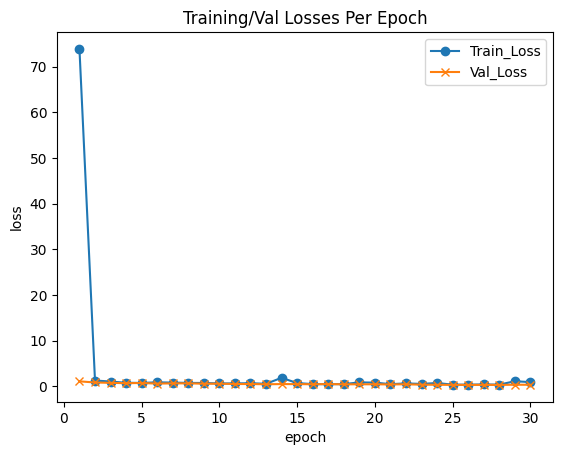

In [ ]:
plotgraphs(dnn3)

In [ ]:
predict = np.argmax(dnn3.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))
report(predict,labels_test)

1492/1492 [==============================] - 2s 2ms/step
        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.22      1.00      0.36      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00       290
           5       1.00      0.07      0.13        29
           6       1.00      0.97      0.99      7110
           7       0.00      0.00      0.00       463
           8       1.00      0.95      0.98      4225
           9       1.00      0.96      0.98      4180
          10       0.98      0.96      0.97      4249
          11       0.00      0.00      0.00        25
          12       1.00      0.97      0.98      3602
          13       0.99      0.95      0.97      4615
          14       0.99      0.95      0.97      5591
          15  

### CNN Models

In [ ]:
# reshape input to be [samples, time steps, features]
y_train= to_categorical(labels_train)
y_test= to_categorical(labels_test)
y_val= to_categorical(labels_val)

X_train = np.array(features_train).reshape(features_train.shape[0], features_train.shape[1], 1)
X_test = np.array(features_test).reshape(features_test.shape[0], features_test.shape[1], 1)
X_val = np.array(features_val).reshape(features_val.shape[0], features_val.shape[1], 1)
X_train.shape , X_test.shape , X_val.shape

((143211, 46, 1), (47738, 46, 1), (47738, 46, 1))

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn3 = Sequential()
cnn3.add(Conv1D(64, 3, input_shape=(46, 1)))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.3))

cnn3.add(Conv1D(64, 1))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.3))

cnn3.add(Conv1D(64, 1))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.3))

cnn3.add(Flatten())
cnn3.add(Dense(64, input_dim=15, kernel_initializer=hidden_initializer))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dense(32))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dense(34, activation='softmax'))

cnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 44, 64)            256       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 44, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 64)            4160      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 22, 64)            0         
                                                        

In [ ]:
cnn3.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
cnn3.fit(X_train, y_train, epochs=30, batch_size=512,
         validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
280/280 [==============================] - 56s 191ms/step - loss: 0.2557 - accuracy: 0.9001 - val_loss: 0.2258 - val_accuracy: 0.9064
Epoch 2/30
280/280 [==============================] - 35s 125ms/step - loss: 0.2508 - accuracy: 0.9022 - val_loss: 0.2176 - val_accuracy: 0.9005
Epoch 3/30
280/280 [==============================] - 29s 102ms/step - loss: 0.2433 - accuracy: 0.9035 - val_loss: 0.2041 - val_accuracy: 0.9158
Epoch 4/30
280/280 [==============================] - 25s 91ms/step - loss: 0.2393 - accuracy: 0.9040 - val_loss: 0.2020 - val_accuracy: 0.9156
Epoch 5/30
280/280 [==============================] - 26s 94ms/step - loss: 0.2390 - accuracy: 0.9054 - val_loss: 0.1996 - val_accuracy: 0.9137
Epoch 6/30
280/280 [==============================] - 27s 97ms/step - loss: 0.2322 - accuracy: 0.9061 - val_loss: 0.2084 - val_accuracy: 0.9108
Epoch 7/30
280/280 [==============================] - 27s 97ms/step - loss: 0.2352 - accuracy: 0.9057 - val_loss: 0.2033 - val_accura

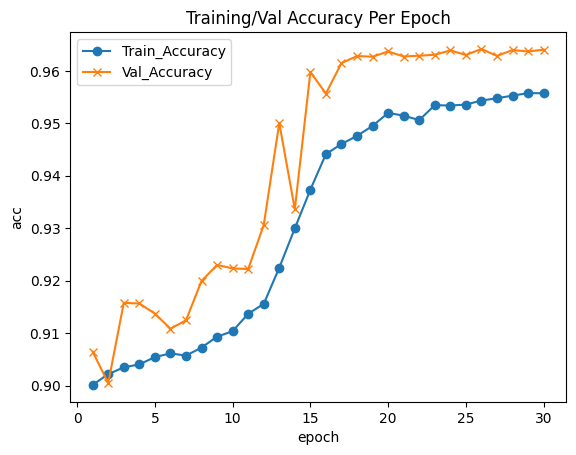

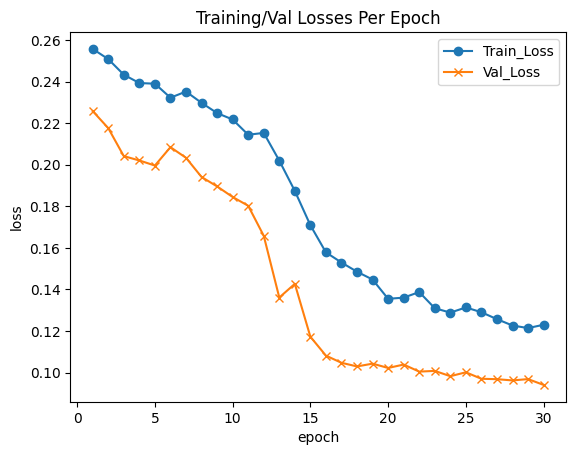

In [ ]:
plotgraphs(cnn3)

In [ ]:
predict = np.argmax(cnn3.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

1492/1492 [==============================] - 6s 4ms/step


In [ ]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.66      0.98      0.79      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.97      0.83      0.90       290
           5       0.62      0.55      0.58        29
           6       1.00      1.00      1.00      7110
           7       0.93      0.96      0.94       463
           8       1.00      1.00      1.00      4225
           9       1.00      1.00      1.00      4180
          10       0.99      1.00      0.99      4249
          11       0.67      0.08      0.14        25
          12       1.00      0.99      0.99      3602
          13       1.00      0.99      1.00      4615
          14       1.00      1.00      1.00      5591
          15       0.98      0.98      0.98       295
          16     

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn2 = Sequential()
cnn2.add(Conv1D(64, 3, input_shape=(46, 1)))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(MaxPooling1D(pool_size=2))
cnn2.add(Dropout(0.3))

cnn2.add(Conv1D(64, 1))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(MaxPooling1D(pool_size=2))
cnn2.add(Dropout(0.3))

cnn2.add(Flatten())
cnn2.add(Dense(64, input_dim=15, kernel_initializer=hidden_initializer))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dense(32))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dense(34, activation='softmax'))

cnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 44, 64)            256       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 44, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 64)            4160      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 22, 64)            0         
                                                        

In [ ]:
cnn2.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
cnn2.fit(X_train, y_train, epochs=30, batch_size=256,
         validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
560/560 [==============================] - 28s 47ms/step - loss: 27.1076 - accuracy: 0.5852 - val_loss: 1.7128 - val_accuracy: 0.7280
Epoch 2/30
560/560 [==============================] - 23s 42ms/step - loss: 3.2439 - accuracy: 0.7194 - val_loss: 0.9963 - val_accuracy: 0.7479
Epoch 3/30
560/560 [==============================] - 26s 47ms/step - loss: 2.0004 - accuracy: 0.7699 - val_loss: 0.7762 - val_accuracy: 0.8235
Epoch 4/30
560/560 [==============================] - 26s 46ms/step - loss: 1.2185 - accuracy: 0.8108 - val_loss: 0.6738 - val_accuracy: 0.8365
Epoch 5/30
560/560 [==============================] - 24s 43ms/step - loss: 1.6365 - accuracy: 0.8274 - val_loss: 0.6636 - val_accuracy: 0.8564
Epoch 6/30
560/560 [==============================] - 26s 47ms/step - loss: 1.1990 - accuracy: 0.8393 - val_loss: 0.4971 - val_accuracy: 0.8685
Epoch 7/30
560/560 [==============================] - 27s 47ms/step - loss: 0.9134 - accuracy: 0.8467 - val_loss: 0.4444 - val_accuracy

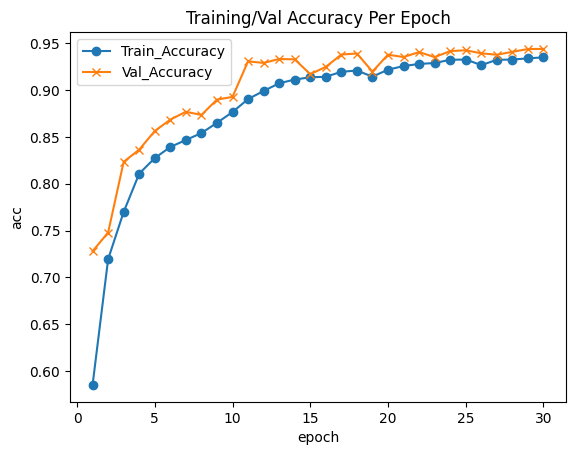

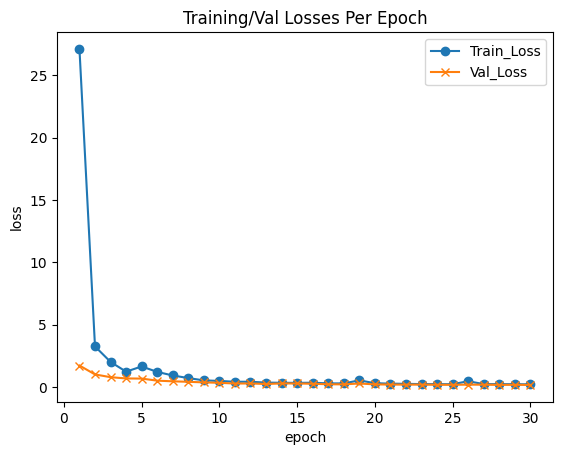

In [ ]:
plotgraphs(cnn2)

In [ ]:
predict = np.argmax(cnn2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

1492/1492 [==============================] - 6s 4ms/step


In [ ]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.58      0.96      0.73      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.67      0.23      0.34       290
           5       0.75      0.10      0.18        29
           6       1.00      1.00      1.00      7110
           7       0.47      0.97      0.64       463
           8       1.00      1.00      1.00      4225
           9       1.00      0.99      1.00      4180
          10       0.99      0.96      0.97      4249
          11       0.00      0.00      0.00        25
          12       0.96      0.99      0.97      3602
          13       1.00      0.99      1.00      4615
          14       1.00      1.00      1.00      5591
          15       0.27      0.02      0.04       295
          16     

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn1 = Sequential()
cnn1.add(Conv1D(64, 3, input_shape=(46, 1)))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(MaxPooling1D(pool_size=2))
cnn1.add(Dropout(0.3))


cnn1.add(Flatten())
cnn1.add(Dense(64, input_dim=15, kernel_initializer=hidden_initializer))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(Dense(32))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(Dense(34, activation='softmax'))

cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 44, 64)            256       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 44, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 64)                90176     
                                                        

In [ ]:
cnn1.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
cnn1.fit(X_train, y_train, epochs=30, batch_size=128,
         validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
1119/1119 [==============================] - 23s 19ms/step - loss: 26.2378 - accuracy: 0.6962 - val_loss: 5.6303 - val_accuracy: 0.7598
Epoch 2/30
1119/1119 [==============================] - 21s 19ms/step - loss: 4.7563 - accuracy: 0.7825 - val_loss: 1.1374 - val_accuracy: 0.8465
Epoch 3/30
1119/1119 [==============================] - 21s 19ms/step - loss: 0.9785 - accuracy: 0.8481 - val_loss: 0.5012 - val_accuracy: 0.8854
Epoch 4/30
1119/1119 [==============================] - 22s 20ms/step - loss: 0.5458 - accuracy: 0.8848 - val_loss: 0.5667 - val_accuracy: 0.9253
Epoch 5/30
1119/1119 [==============================] - 21s 19ms/step - loss: 0.4385 - accuracy: 0.9056 - val_loss: 0.2959 - val_accuracy: 0.9224
Epoch 6/30
1119/1119 [==============================] - 23s 21ms/step - loss: 0.3374 - accuracy: 0.9161 - val_loss: 0.2436 - val_accuracy: 0.9290
Epoch 7/30
1119/1119 [==============================] - 20s 18ms/step - loss: 0.3530 - accuracy: 0.9203 - val_loss: 0.2270 

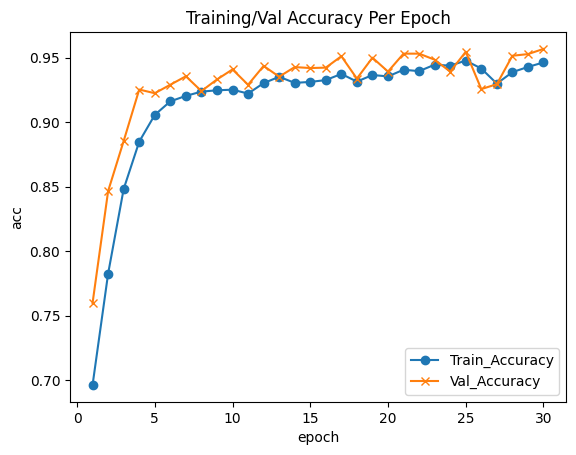

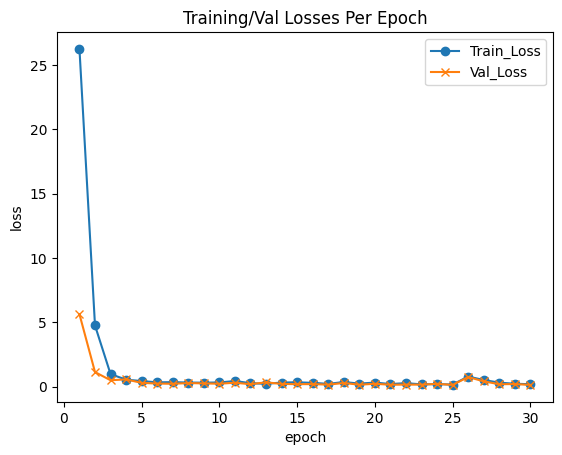

In [ ]:
plotgraphs(cnn1)

In [ ]:
predict = np.argmax(cnn1.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

1492/1492 [==============================] - 4s 3ms/step


In [ ]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.59      0.99      0.74      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.88      0.91      0.89       290
           5       0.44      0.55      0.49        29
           6       1.00      1.00      1.00      7110
           7       0.99      0.96      0.97       463
           8       1.00      0.99      1.00      4225
           9       1.00      0.99      1.00      4180
          10       0.99      0.95      0.97      4249
          11       0.00      0.00      0.00        25
          12       0.96      0.99      0.97      3602
          13       0.99      1.00      0.99      4615
          14       1.00      1.00      1.00      5591
          15       0.97      0.90      0.93       295
          16     

### RNN Models

In [ ]:
# reshape input to be [samples, time steps, features] for RNN
RNN_features_train = np.reshape(features_train, (features_train.shape[0],features_train.shape[1],1))
RNN_features_test = np.reshape(features_test, (features_test.shape[0],features_test.shape[1],1))
RNN_features_val = np.reshape(features_val, (features_val.shape[0],features_val.shape[1],1))

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)
# Initialising the RNN
rnn1 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn1.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (46,1)))
rnn1.add(Dropout(0.1))

# Adding the output layer
rnn1.add(Flatten())
rnn1.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn1.add(LeakyReLU(alpha=0.1))
rnn1.add(Dense(16))
rnn1.add(LeakyReLU(alpha=0.1))
rnn1.add(Dense(units = 34, activation='softmax'))

rnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 46, 32)            1088      
                                                                 
 dropout (Dropout)           (None, 46, 32)            0         
                                                                 
 flatten (Flatten)           (None, 1472)              0         
                                                                 
 dense (Dense)               (None, 32)                47136     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0

In [ ]:
rnn1.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn1.fit(RNN_features_train, y_train, epochs=30, batch_size=256,
         validation_data=(RNN_features_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
560/560 [==============================] - 22s 36ms/step - loss: 22.6143 - accuracy: 0.5935 - val_loss: 1.3981 - val_accuracy: 0.7542
Epoch 2/30
560/560 [==============================] - 20s 35ms/step - loss: 1.8775 - accuracy: 0.7998 - val_loss: 1.1314 - val_accuracy: 0.8234
Epoch 3/30
560/560 [==============================] - 19s 35ms/step - loss: 2.0669 - accuracy: 0.8461 - val_loss: 1.0095 - val_accuracy: 0.8797
Epoch 4/30
560/560 [==============================] - 20s 35ms/step - loss: 1.1273 - accuracy: 0.8732 - val_loss: 0.5375 - val_accuracy: 0.8948
Epoch 5/30
560/560 [==============================] - 19s 33ms/step - loss: 0.7968 - accuracy: 0.8948 - val_loss: 0.3926 - val_accuracy: 0.9132
Epoch 6/30
560/560 [==============================] - 20s 35ms/step - loss: 0.6608 - accuracy: 0.9068 - val_loss: 0.8566 - val_accuracy: 0.9192
Epoch 7/30
560/560 [==============================] - 19s 35ms/step - loss: 0.6197 - accuracy: 0.9136 - val_loss: 3.7224 - val_accuracy

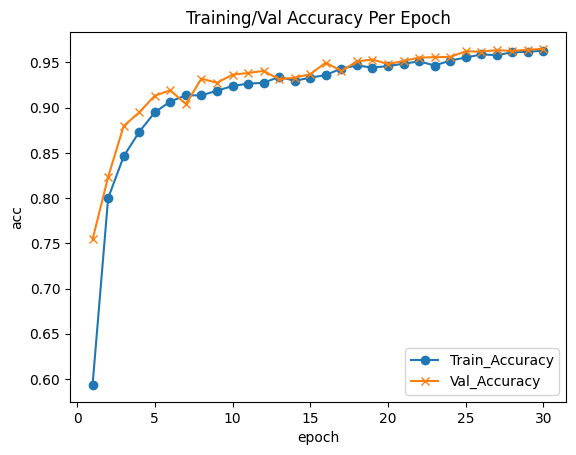

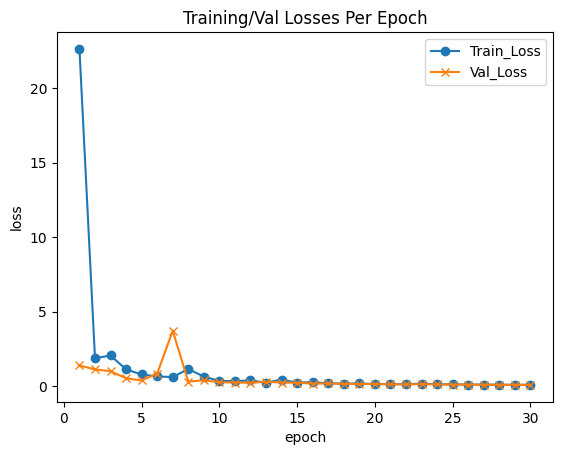

In [ ]:
plotgraphs(rnn1)

In [ ]:
predict = np.argmax(rnn1.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

1492/1492 [==============================] - 8s 5ms/step


In [ ]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.66      0.96      0.78      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.99      0.97      0.98       290
           5       0.69      0.83      0.75        29
           6       1.00      1.00      1.00      7110
           7       0.95      0.97      0.96       463
           8       1.00      1.00      1.00      4225
           9       1.00      1.00      1.00      4180
          10       1.00      0.99      1.00      4249
          11       0.83      0.20      0.32        25
          12       1.00      1.00      1.00      3602
          13       1.00      1.00      1.00      4615
          14       1.00      1.00      1.00      5591
          15       0.97      0.99      0.98       295
          16     

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)
# Initialising the RNN
rnn2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn2.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (46,1)))
rnn2.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn2.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn2.add(Dropout(0.1))

# Adding the output layer
rnn2.add(Flatten())
rnn2.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn2.add(LeakyReLU(alpha=0.1))
rnn2.add(Dense(16))
rnn2.add(LeakyReLU(alpha=0.1))
rnn2.add(Dense(units = 34, activation='softmax'))

rnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 46, 32)            1088      
                                                                 
 dropout (Dropout)           (None, 46, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 46, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 46, 32)            0         
                                                                 
 flatten (Flatten)           (None, 1472)              0         
                                                                 
 dense (Dense)               (None, 32)                47136     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0

In [ ]:
rnn2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn2.fit(RNN_features_train, y_train, epochs=30, batch_size=512,
         validation_data=(RNN_features_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
280/280 [==============================] - 30s 98ms/step - loss: 22.3398 - accuracy: 0.4944 - val_loss: 1.9739 - val_accuracy: 0.7578
Epoch 2/30
280/280 [==============================] - 27s 97ms/step - loss: 2.6285 - accuracy: 0.7904 - val_loss: 1.0989 - val_accuracy: 0.8662
Epoch 3/30
280/280 [==============================] - 27s 96ms/step - loss: 1.3657 - accuracy: 0.8482 - val_loss: 0.6755 - val_accuracy: 0.8981
Epoch 4/30
280/280 [==============================] - 26s 94ms/step - loss: 0.9295 - accuracy: 0.8733 - val_loss: 0.4459 - val_accuracy: 0.9036
Epoch 5/30
280/280 [==============================] - 27s 96ms/step - loss: 0.7289 - accuracy: 0.8907 - val_loss: 0.8121 - val_accuracy: 0.9135
Epoch 6/30
280/280 [==============================] - 27s 96ms/step - loss: 0.5944 - accuracy: 0.9020 - val_loss: 0.2921 - val_accuracy: 0.9240
Epoch 7/30
280/280 [==============================] - 26s 93ms/step - loss: 0.4183 - accuracy: 0.9124 - val_loss: 0.2691 - val_accuracy

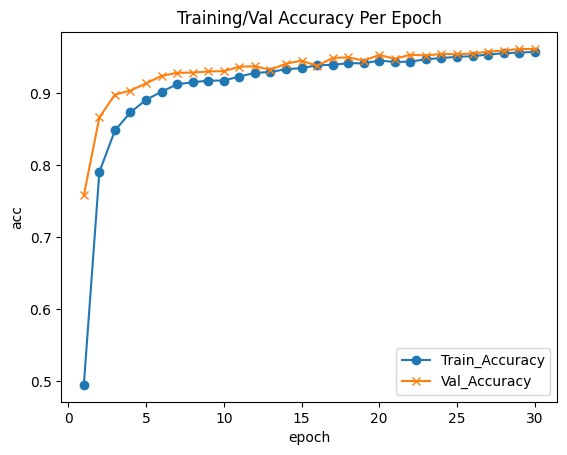

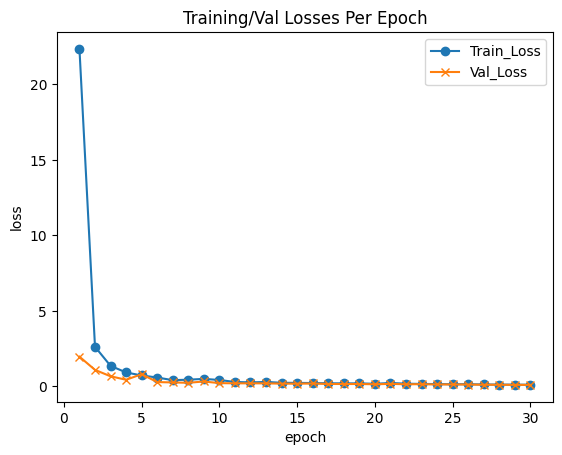

In [ ]:
plotgraphs(rnn2)

In [ ]:
predict = np.argmax(rnn2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

1492/1492 [==============================] - 12s 8ms/step


In [ ]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      0.98      0.76      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.90      0.96      0.93       290
           5       0.54      0.45      0.49        29
           6       1.00      1.00      1.00      7110
           7       0.97      0.95      0.96       463
           8       1.00      1.00      1.00      4225
           9       1.00      1.00      1.00      4180
          10       0.99      0.99      0.99      4249
          11       0.00      0.00      0.00        25
          12       0.99      0.99      0.99      3602
          13       1.00      1.00      1.00      4615
          14       1.00      1.00      1.00      5591
          15       0.97      0.95      0.96       295
          16     

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)
# Initialising the RNN
rnn3 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (46,1)))
rnn3.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.1))

# Adding a third RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.1))

# Adding the output layer
rnn3.add(Flatten())
rnn3.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(16))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(units = 34, activation='softmax'))

rnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 46, 32)            1088      
                                                                 
 dropout (Dropout)           (None, 46, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 46, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 46, 32)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 46, 32)            2080      
                                                                 
 dropout_2 (Dropout)         (None, 46, 32)            0         
                                                                 
 flatten (Flatten)           (None, 1472)              0

In [ ]:
rnn3.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn3.fit(RNN_features_train, y_train, epochs=30, batch_size=512,
         validation_data=(RNN_features_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
280/280 [==============================] - 43s 140ms/step - loss: 18.2187 - accuracy: 0.4651 - val_loss: 1.5766 - val_accuracy: 0.7326
Epoch 2/30
280/280 [==============================] - 38s 137ms/step - loss: 2.2849 - accuracy: 0.7551 - val_loss: 0.8092 - val_accuracy: 0.8023
Epoch 3/30
280/280 [==============================] - 39s 141ms/step - loss: 1.2755 - accuracy: 0.8183 - val_loss: 0.4929 - val_accuracy: 0.8689
Epoch 4/30
280/280 [==============================] - 37s 131ms/step - loss: 0.8248 - accuracy: 0.8538 - val_loss: 0.3970 - val_accuracy: 0.8838
Epoch 5/30
280/280 [==============================] - 37s 133ms/step - loss: 0.6676 - accuracy: 0.8689 - val_loss: 0.3944 - val_accuracy: 0.9053
Epoch 6/30
280/280 [==============================] - 38s 136ms/step - loss: 0.5333 - accuracy: 0.8891 - val_loss: 0.2808 - val_accuracy: 0.9217
Epoch 7/30
280/280 [==============================] - 38s 135ms/step - loss: 0.4441 - accuracy: 0.9069 - val_loss: 0.3746 - val_a

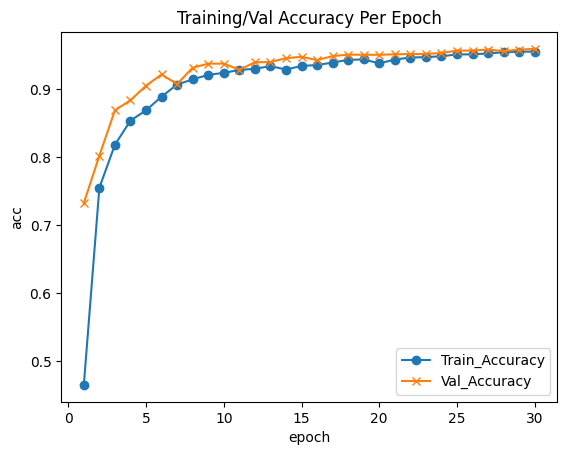

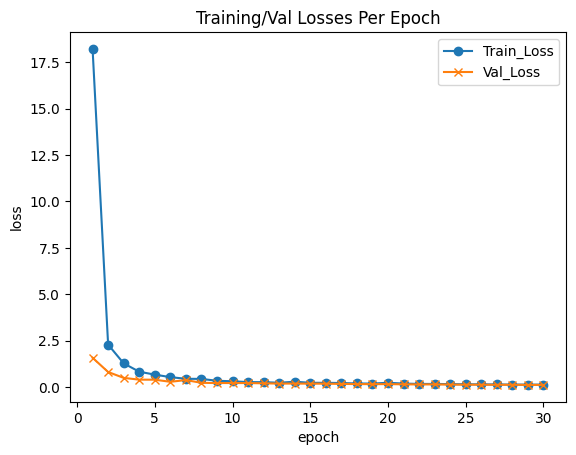

In [ ]:
plotgraphs(rnn3)

In [ ]:
predict = np.argmax(rnn3.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

1492/1492 [==============================] - 16s 10ms/step


In [ ]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.58      0.98      0.73      1117
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.84      0.96      0.90       290
           5       0.57      0.41      0.48        29
           6       1.00      1.00      1.00      7110
           7       0.99      0.96      0.97       463
           8       1.00      1.00      1.00      4225
           9       1.00      1.00      1.00      4180
          10       0.99      0.99      0.99      4249
          11       0.00      0.00      0.00        25
          12       0.99      0.99      0.99      3602
          13       0.99      1.00      0.99      4615
          14       1.00      0.99      1.00      5591
          15       0.98      0.96      0.97       295
          16     